In [705]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import numpy as np
from sklearn.metrics import roc_curve,auc
from sklearn.preprocessing import label_binarize
import pickle




In [706]:
data = pd.read_csv("ASD_DATA-ASD_DATA.csv")

In [707]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52 entries, 0 to 51
Data columns (total 20 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Age                52 non-null     float64
 1   Gender             52 non-null     object 
 2   Delivery           52 non-null     object 
 3   Birth Injury       52 non-null     object 
 4   Jaundice           52 non-null     object 
 5   Cousin Marriage    52 non-null     object 
 6   Q1                 52 non-null     object 
 7   Q2                 52 non-null     object 
 8   Q3                 52 non-null     object 
 9   Q4                 52 non-null     object 
 10  Q5                 52 non-null     object 
 11  Q6                 52 non-null     object 
 12  Q7                 52 non-null     object 
 13  Q8                 52 non-null     object 
 14  Q9                 52 non-null     object 
 15  Q10                52 non-null     object 
 16  Q11                52 non-nu

In [708]:
data.shape

(52, 20)

In [709]:
from collections import Counter
print(sorted(Counter(data['Result']).items()))

[('ASD', 5), ('Normal', 36), ('Others', 4), ('SLD', 7)]


In [710]:
asd=data[data['Result']=='ASD']
normal=data[data['Result']=='Normal']
others=data[data['Result']=='Others']
sld=data[data['Result']=='SLD']

In [711]:
X=data
Y=data['Result']

In [712]:
X.drop('Result',axis=1,inplace=True)

OverSampling


In [713]:
from imblearn import over_sampling
from imblearn. over_sampling import RandomOverSampler
ros=RandomOverSampler(random_state=0)
X_resampled, y_resampled = ros.fit_resample(X, Y)
print(sorted(Counter(y_resampled).items()),y_resampled.shape)

[('ASD', 36), ('Normal', 36), ('Others', 36), ('SLD', 36)] (144,)


In [714]:
X_resampled.insert(len(X_resampled.columns), 'Result', y_resampled.values)
print(X_resampled)

     Age  Gender   Delivery Birth Injury Jaundice Cousin Marriage   Q1   Q2  \
0    6.0    Male  c-section           no       no              no  yes  yes   
1    1.9    Male  c-section           no       no              no   no   no   
2    5.3    Male     normal           no       no              no  yes  yes   
3    6.0  Female  c-section           no      yes              no  yes  yes   
4    8.0    Male     normal           no       no              no  yes  yes   
..   ...     ...        ...          ...      ...             ...  ...  ...   
139  4.5    Male  c-section           no       no              no  yes  yes   
140  3.5    Male  c-section           no       no              no  yes  no    
141  4.5    Male  c-section           no       no              no  yes  yes   
142  4.5    Male  c-section           no       no              no  yes  yes   
143  4.5    Male  c-section           no       no              no  yes  yes   

      Q3           Q4   Q5                   Q6   Q

In [715]:
data2= X_resampled

In [716]:
from sklearn.preprocessing import LabelEncoder

In [717]:
Le_Gender = LabelEncoder()
Le_Delivery = LabelEncoder()
Le_BirthInjury = LabelEncoder()
Le_Jaundice = LabelEncoder()
Le_CousinMarriage = LabelEncoder()
Le_Q1 = LabelEncoder()
Le_Q2 = LabelEncoder()
Le_Q3 = LabelEncoder()
Le_Q4 = LabelEncoder()
Le_Q5 = LabelEncoder()
Le_Q6 = LabelEncoder()
Le_Q7 = LabelEncoder()
Le_Q8 = LabelEncoder()
Le_Q9 = LabelEncoder()
Le_Q10 = LabelEncoder()
Le_Q11 = LabelEncoder()

In [718]:
data2['Gender_n'] = Le_Gender.fit_transform(data2['Gender'])
data2['Delivery_n'] = Le_Delivery.fit_transform(data2['Delivery'])
data2['BirthInjury_n'] = Le_BirthInjury.fit_transform(data2['Birth Injury'])
data2['Jaundice_n'] = Le_Jaundice.fit_transform(data2['Jaundice'])
data2['CousinMarriage_n'] = Le_CousinMarriage.fit_transform(data2['Cousin Marriage'])
data2['Q1_n'] = Le_Q1.fit_transform(data2['Q1'])
data2['Q2_n'] = Le_Q2.fit_transform(data2['Q2'])
data2['Q3_n'] = Le_Q3.fit_transform(data2['Q3'])
data2['Q4_n'] = Le_Q4.fit_transform(data2['Q4'])
data2['Q5_n'] = Le_Q5.fit_transform(data2['Q5'])
data2['Q6_n'] = Le_Q6.fit_transform(data2['Q6'])
data2['Q7_n'] = Le_Q7.fit_transform(data2['Q7'])
data2['Q8_n'] = Le_Q8.fit_transform(data2['Q8'])
data2['Q9_n'] = Le_Q9.fit_transform(data2['Q9'])
data2['Q10_n'] = Le_Q10.fit_transform(data2['Q10'])
data2['Q11_n'] = Le_Q11.fit_transform(data2['Q11'])

In [719]:
data3 = data2.drop(['Gender','Delivery', 'Birth Injury','Jaundice', 'Cousin Marriage','Q1','Q2','Q3','Q4','Q5','Q6','Q7',
         'Q8','Q9','Q10','Q11'], axis = 'columns')

In [720]:
data2

,Age,Gender,Delivery,Birth Injury,Jaundice,Cousin Marriage,Q1,Q2,Q3,Q4,...,Q2_n,Q3_n,Q4_n,Q5_n,Q6_n,Q7_n,Q8_n,Q9_n,Q10_n,Q11_n
0,6.0,Male,c-section,no,no,no,yes,yes,yes,no response,...,2,1,3,1,3,1,2,1,1,0
1,1.9,Male,c-section,no,no,no,no,no,no,aggressive,...,0,0,0,0,3,0,2,0,0,1
2,5.3,Male,normal,no,no,no,yes,yes,yes,aggressive,...,2,1,0,1,1,0,0,0,0,1
3,6.0,Female,c-section,no,yes,no,yes,yes,yes,cry,...,2,1,1,1,4,1,0,1,0,4
4,8.0,Male,normal,no,no,no,yes,yes,yes,cry,...,2,1,1,1,2,0,0,0,0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
139,4.5,Male,c-section,no,no,no,yes,yes,yes,no response,...,2,1,3,1,4,1,2,1,1,2
140,3.5,Male,c-section,no,no,no,yes,no,yes,shouting,...,1,1,4,1,1,1,1,0,1,0
141,4.5,Male,c-section,no,no,no,yes,yes,yes,no response,...,2,1,3,1,4,1,2,1,1,2
142,4.5,Male,c-section,no,no,no,yes,yes,yes,no response,...,2,1,3,1,4,1,2,1,1,2


## Test and Train

In [721]:
from sklearn.model_selection import train_test_split
seed = 42
np.random.seed(seed)

In [722]:
data_train, data_test = train_test_split(data3, test_size=0.3, random_state=seed, shuffle=True, stratify=data2['Result'])
y_train = data_train['Result']
X_train = data_train.drop(columns=['Result'])
y_test = data_test['Result']
X_test = data_test.drop(columns=['Result'])

In [723]:
y_train

79        ASD
68        ASD
83     Others
113    Others
31        ASD
        ...  
137       SLD
3      Others
11     Others
136       SLD
39     Normal
Name: Result, Length: 100, dtype: object

In [724]:
y_test

123       SLD
7      Normal
43     Normal
16     Normal
67        ASD
13     Normal
72        ASD
69        ASD
104    Others
40     Normal
130       SLD
23     Normal
54        ASD
25        SLD
119       SLD
86     Others
135       SLD
65        ASD
46     Normal
92     Others
140       SLD
74        ASD
33     Normal
36     Normal
2         SLD
108    Others
94     Others
8      Normal
15        SLD
53        ASD
57        ASD
61        ASD
88     Others
112    Others
110    Others
93     Others
26     Others
75        ASD
70        ASD
50     Normal
115       SLD
116       SLD
96     Others
30        SLD
Name: Result, dtype: object

In [725]:
X_test

,Age,Object Rating,Body Part Rating,Gender_n,Delivery_n,BirthInjury_n,Jaundice_n,CousinMarriage_n,Q1_n,Q2_n,Q3_n,Q4_n,Q5_n,Q6_n,Q7_n,Q8_n,Q9_n,Q10_n,Q11_n
123,3.50,3,3,1,0,0,0,0,1,1,1,4,1,1,1,1,0,1,0
7,3.20,0,0,1,0,0,0,0,1,0,0,3,0,2,1,0,0,0,0
43,7.90,0,0,1,0,0,0,1,1,2,1,1,0,4,1,0,0,0,1
16,5.00,1,1,1,0,0,0,0,1,2,0,4,1,4,1,2,1,1,1
67,8.00,0,0,1,1,0,0,0,1,2,1,1,1,2,0,0,0,0,3
13,2.20,0,0,1,0,0,0,0,1,2,0,1,0,4,1,0,1,0,1
72,2.80,0,0,0,0,0,0,0,1,0,0,3,0,4,1,0,0,0,5
69,6.00,1,1,1,0,0,0,0,1,2,1,3,1,3,1,2,1,1,0
104,6.00,0,1,0,0,0,1,0,1,2,1,1,1,4,1,0,1,0,4
40,3.00,5,5,1,1,0,0,0,1,2,1,1,1,2,1,0,0,0,5


###Decision tree

In [726]:
#decision tree
from sklearn import tree
model = tree.DecisionTreeClassifier()

In [727]:
model.fit(X_train,y_train)

DecisionTreeClassifier()

In [728]:
model.score(X_train,y_train)

1.0

In [729]:
prediction = model.predict(X_test)
prediction

array(['SLD', 'Normal', 'Normal', 'SLD', 'ASD', 'Normal', 'ASD', 'ASD',
       'Others', 'Normal', 'SLD', 'Others', 'ASD', 'SLD', 'SLD', 'Others',
       'SLD', 'ASD', 'Normal', 'Others', 'SLD', 'ASD', 'Normal', 'Normal',
       'SLD', 'Others', 'Others', 'Normal', 'SLD', 'ASD', 'ASD', 'ASD',
       'Others', 'Others', 'Others', 'Others', 'Others', 'ASD', 'ASD',
       'Normal', 'SLD', 'SLD', 'Others', 'SLD'], dtype=object)

In [730]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,prediction)

0.9545454545454546

In [731]:
from joblib import dump, load
dump(model, 'model.joblib')

['model.joblib']

In [732]:
from sklearn.metrics import roc_auc_score

In [733]:
y_pred_proba = model.predict_proba(X_test)

In [734]:
roc_auc_score(y_test,y_pred_proba,multi_class="ovr")

0.9696969696969697

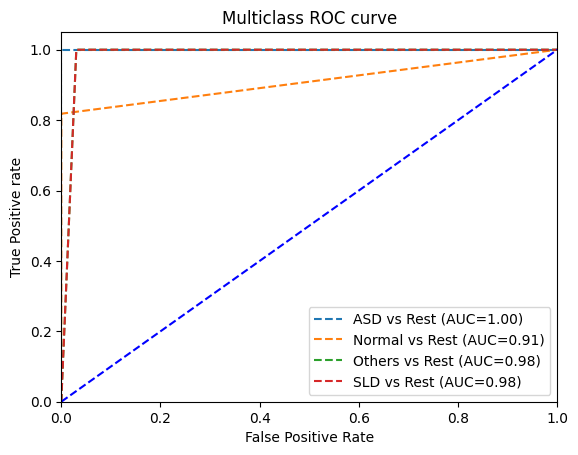

In [735]:
#binarize the y_values
classes=np.unique(y_test)
y_test_binarized=label_binarize(y_test,classes=np.unique(y_test))

# roc curve for classes
fpr = {}
tpr = {}
thresh ={}
roc_auc = dict()

n_class = classes.shape[0]

for i in range(n_class):
    fpr[i], tpr[i], thresh[i] = roc_curve(y_test_binarized[:,i], y_pred_proba[:,i])
    roc_auc[i] = auc(fpr[i], tpr[i])

    # plotting
    plt.plot(fpr[i], tpr[i], linestyle='--',
             label='%s vs Rest (AUC=%0.2f)'%(classes[i],roc_auc[i]))

plt.plot([0,1],[0,1],'b--')
plt.xlim([0,1])
plt.ylim([0,1.05])
plt.title('Multiclass ROC curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive rate')
plt.legend(loc='lower right')
plt.show()

In [736]:
from sklearn.metrics import classification_report,confusion_matrix
print(confusion_matrix(y_test,prediction))
print(classification_report(y_test,prediction))

[[11  0  0  0]
 [ 0  9  1  1]
 [ 0  0 11  0]
 [ 0  0  0 11]]
              precision    recall  f1-score   support

         ASD       1.00      1.00      1.00        11
      Normal       1.00      0.82      0.90        11
      Others       0.92      1.00      0.96        11
         SLD       0.92      1.00      0.96        11

    accuracy                           0.95        44
   macro avg       0.96      0.95      0.95        44
weighted avg       0.96      0.95      0.95        44



## LogisticRegression

In [737]:
# LogisticRegression
from sklearn.linear_model import LogisticRegression
linmodel = LogisticRegression()

In [738]:
linmodel.fit(X_train,y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [739]:
linmodel.score(X_train,y_train)

0.95

In [740]:

dump(linmodel, 'linmodel.joblib')

['linmodel.joblib']

In [741]:
lnprediction = linmodel.predict(X_test)
lnprediction

array(['SLD', 'Normal', 'Normal', 'ASD', 'ASD', 'Normal', 'ASD', 'ASD',
       'Others', 'Normal', 'Normal', 'Others', 'ASD', 'SLD', 'SLD',
       'Others', 'SLD', 'ASD', 'Normal', 'Others', 'SLD', 'ASD', 'Normal',
       'Normal', 'Normal', 'Others', 'Others', 'Normal', 'SLD', 'ASD',
       'ASD', 'ASD', 'Others', 'Others', 'Others', 'Others', 'Others',
       'ASD', 'ASD', 'Normal', 'SLD', 'Normal', 'Others', 'SLD'],
      dtype=object)

In [742]:
lnprediction_proba = linmodel.predict_proba(X_test)

In [743]:
np.mean(lnprediction == y_test)

0.8863636363636364

In [744]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,lnprediction)

0.8863636363636364

In [745]:
roc_auc_score(y_test,lnprediction_proba,multi_class="ovr")

0.9166666666666666

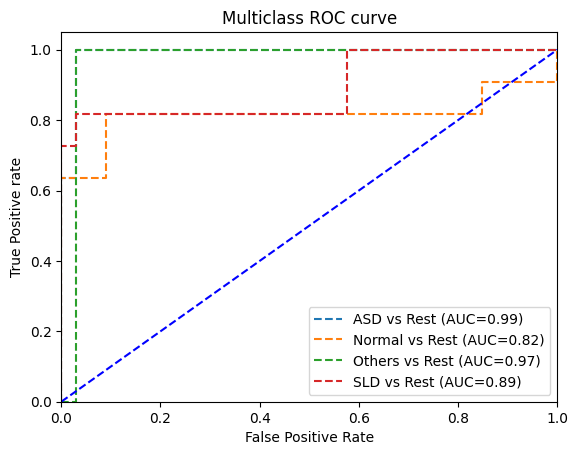

In [746]:
# roc curve for classes
for i in range(n_class):
    fpr[i], tpr[i], thresh[i] = roc_curve(y_test_binarized[:,i], lnprediction_proba[:,i])
    roc_auc[i] = auc(fpr[i], tpr[i])

    # plotting
    plt.plot(fpr[i], tpr[i], linestyle='--',
             label='%s vs Rest (AUC=%0.2f)'%(classes[i],roc_auc[i]))

plt.plot([0,1],[0,1],'b--')
plt.xlim([0,1])
plt.ylim([0,1.05])
plt.title('Multiclass ROC curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive rate')
plt.legend(loc='lower right')
plt.show()

In [747]:
print(confusion_matrix(y_test,prediction))
print(classification_report(y_test,lnprediction))

[[11  0  0  0]
 [ 0  9  1  1]
 [ 0  0 11  0]
 [ 0  0  0 11]]
              precision    recall  f1-score   support

         ASD       0.92      1.00      0.96        11
      Normal       0.75      0.82      0.78        11
      Others       0.92      1.00      0.96        11
         SLD       1.00      0.73      0.84        11

    accuracy                           0.89        44
   macro avg       0.90      0.89      0.88        44
weighted avg       0.90      0.89      0.88        44



##RandomForestClassifier

In [748]:
#RandomForestClassifier
from sklearn.ensemble import RandomForestClassifier
RFmodel = RandomForestClassifier()

In [749]:
RFmodel.fit(X_train,y_train)

RandomForestClassifier()

In [750]:
RFmodel.score(X_train,y_train)

1.0

In [751]:
RFprediction = RFmodel.predict(X_test)
RFprediction

array(['SLD', 'Normal', 'Normal', 'ASD', 'ASD', 'Normal', 'ASD', 'ASD',
       'Others', 'Normal', 'SLD', 'Others', 'ASD', 'SLD', 'SLD', 'Others',
       'SLD', 'ASD', 'Normal', 'Others', 'SLD', 'ASD', 'Normal', 'Normal',
       'SLD', 'Others', 'Others', 'Normal', 'SLD', 'ASD', 'ASD', 'ASD',
       'Others', 'Others', 'Others', 'Others', 'Others', 'ASD', 'ASD',
       'Normal', 'SLD', 'SLD', 'Others', 'SLD'], dtype=object)

In [752]:
RFprediction_proba = RFmodel.predict_proba(X_test)

In [753]:
np.mean(RFprediction == y_test)

0.9545454545454546

In [754]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,RFprediction)

0.9545454545454546

In [755]:
roc_auc_score(y_test,RFprediction_proba,multi_class="ovr")

0.9958677685950413

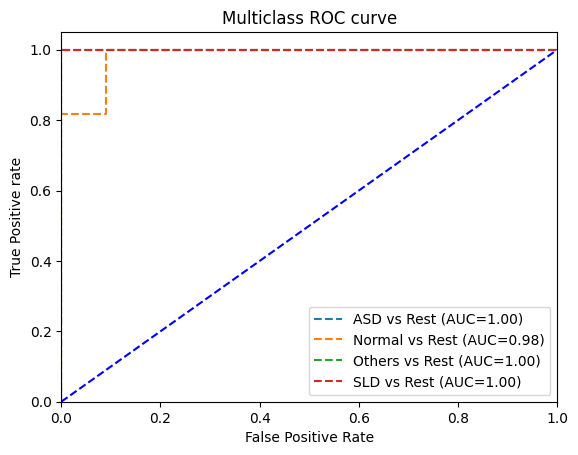

In [756]:
for i in range(n_class):
    fpr[i], tpr[i], thresh[i] = roc_curve(y_test_binarized[:,i], RFprediction_proba[:,i])
    roc_auc[i] = auc(fpr[i], tpr[i])

    # plotting
    plt.plot(fpr[i], tpr[i], linestyle='--',
             label='%s vs Rest (AUC=%0.2f)'%(classes[i],roc_auc[i]))

plt.plot([0,1],[0,1],'b--')
plt.xlim([0,1])
plt.ylim([0,1.05])
plt.title('Multiclass ROC curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive rate')
plt.legend(loc='lower right')
plt.show()

In [757]:
from sklearn.metrics import classification_report,confusion_matrix
print(confusion_matrix(y_test,prediction))
print(classification_report(y_test,RFprediction))

[[11  0  0  0]
 [ 0  9  1  1]
 [ 0  0 11  0]
 [ 0  0  0 11]]
              precision    recall  f1-score   support

         ASD       0.92      1.00      0.96        11
      Normal       1.00      0.82      0.90        11
      Others       0.92      1.00      0.96        11
         SLD       1.00      1.00      1.00        11

    accuracy                           0.95        44
   macro avg       0.96      0.95      0.95        44
weighted avg       0.96      0.95      0.95        44



In [758]:

dump(RFmodel, 'RFmodel.joblib')

['RFmodel.joblib']

##SVM

In [759]:
#SVM

from sklearn.svm import SVC
svmodel = SVC()

In [760]:
svmodel.fit(X_train, y_train)

SVC()

In [761]:
svmodel.score(X_train,y_train)

0.91

In [762]:
svmprediction = svmodel.predict(X_test)
svmprediction

array(['SLD', 'Normal', 'Normal', 'SLD', 'ASD', 'Normal', 'ASD', 'ASD',
       'Others', 'Normal', 'Normal', 'Others', 'ASD', 'SLD', 'SLD',
       'Others', 'SLD', 'ASD', 'Normal', 'Others', 'SLD', 'ASD', 'Normal',
       'Normal', 'Others', 'Others', 'Others', 'Normal', 'SLD', 'ASD',
       'ASD', 'ASD', 'Others', 'Others', 'Others', 'Others', 'Others',
       'ASD', 'ASD', 'ASD', 'SLD', 'Others', 'Others', 'SLD'],
      dtype=object)

In [763]:
np.mean(svmprediction == y_test)

0.8636363636363636

In [764]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,svmprediction)

0.8636363636363636

In [765]:
from sklearn.metrics import classification_report,confusion_matrix
print(confusion_matrix(y_test,prediction))
print(classification_report(y_test,svmprediction))

[[11  0  0  0]
 [ 0  9  1  1]
 [ 0  0 11  0]
 [ 0  0  0 11]]
              precision    recall  f1-score   support

         ASD       0.92      1.00      0.96        11
      Normal       0.89      0.73      0.80        11
      Others       0.79      1.00      0.88        11
         SLD       0.89      0.73      0.80        11

    accuracy                           0.86        44
   macro avg       0.87      0.86      0.86        44
weighted avg       0.87      0.86      0.86        44



##AdaBoostClassifier

In [766]:
from sklearn.ensemble import AdaBoostClassifier


In [767]:
Adabstmodel = AdaBoostClassifier ()


In [768]:
Adabstmodel.fit(X_train,y_train)

AdaBoostClassifier()

In [769]:
Adabstmodel.score(X_train,y_train)

0.44

In [770]:
Aprediction = Adabstmodel.predict(X_test)
Aprediction

array(['SLD', 'ASD', 'ASD', 'SLD', 'Normal', 'Normal', 'Normal', 'Others',
       'Others', 'SLD', 'ASD', 'Normal', 'Normal', 'SLD', 'SLD', 'Others',
       'SLD', 'Normal', 'Normal', 'Others', 'SLD', 'Normal', 'ASD', 'SLD',
       'Normal', 'Others', 'SLD', 'ASD', 'SLD', 'Others', 'Normal',
       'Others', 'Others', 'Others', 'Others', 'Others', 'SLD', 'Others',
       'Normal', 'ASD', 'Normal', 'Normal', 'Others', 'SLD'], dtype=object)

In [771]:
Aprediction_proba = Adabstmodel.predict_proba(X_test)

In [772]:
np.mean(Aprediction == y_test)

0.4318181818181818

In [773]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,Aprediction)

0.4318181818181818

In [774]:
roc_auc_score(y_test,Aprediction_proba,multi_class="ovr")

0.7327823691460056

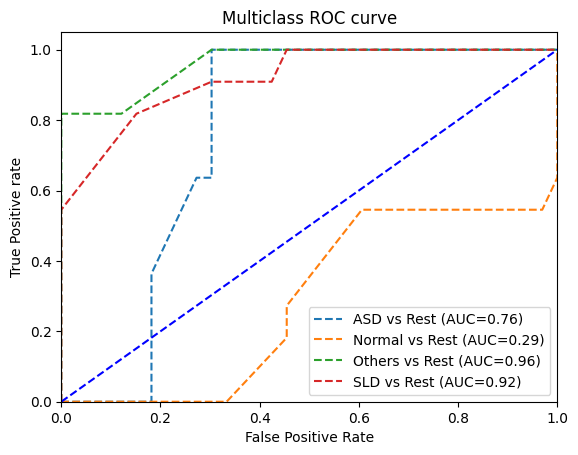

In [775]:

for i in range(n_class):
    fpr[i], tpr[i], thresh[i] = roc_curve(y_test_binarized[:,i], Aprediction_proba[:,i])
    roc_auc[i] = auc(fpr[i], tpr[i])

    # plotting
    plt.plot(fpr[i], tpr[i], linestyle='--',
             label='%s vs Rest (AUC=%0.2f)'%(classes[i],roc_auc[i]))

plt.plot([0,1],[0,1],'b--')
plt.xlim([0,1])
plt.ylim([0,1.05])
plt.title('Multiclass ROC curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive rate')
plt.legend(loc='lower right')
plt.show()

In [776]:
from sklearn.metrics import classification_report,confusion_matrix
print(confusion_matrix(y_test,Aprediction))
print(classification_report(y_test,Aprediction))

[[0 7 4 0]
 [5 3 0 3]
 [0 0 9 2]
 [1 3 0 7]]
              precision    recall  f1-score   support

         ASD       0.00      0.00      0.00        11
      Normal       0.23      0.27      0.25        11
      Others       0.69      0.82      0.75        11
         SLD       0.58      0.64      0.61        11

    accuracy                           0.43        44
   macro avg       0.38      0.43      0.40        44
weighted avg       0.38      0.43      0.40        44



##KNeighborsClassifier

In [777]:
from sklearn.neighbors import KNeighborsClassifier

In [778]:
knn = KNeighborsClassifier(n_neighbors = 1)

In [779]:
knn.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=1)

In [780]:
knn.score(X_train,y_train)

1.0

In [781]:
knnprediction = knn.predict(X_test)
knnprediction


array(['SLD', 'Normal', 'Normal', 'ASD', 'ASD', 'Normal', 'ASD', 'ASD',
       'Others', 'Normal', 'SLD', 'Others', 'ASD', 'SLD', 'SLD', 'Others',
       'SLD', 'ASD', 'Normal', 'Others', 'SLD', 'ASD', 'Normal', 'Normal',
       'SLD', 'Others', 'Others', 'Normal', 'SLD', 'ASD', 'ASD', 'ASD',
       'Others', 'Others', 'Others', 'Others', 'Others', 'ASD', 'ASD',
       'Normal', 'SLD', 'SLD', 'Others', 'SLD'], dtype=object)

In [782]:
knnprediction_proba = knn.predict_proba(X_test)

In [783]:
np.mean(knnprediction == y_test)

0.9545454545454546

In [784]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,knnprediction)

0.9545454545454546

In [785]:

dump(knn, 'knnmodel.joblib')

['knnmodel.joblib']

In [786]:
roc_auc_score(y_test,knnprediction_proba,multi_class="ovr")

0.9696969696969697

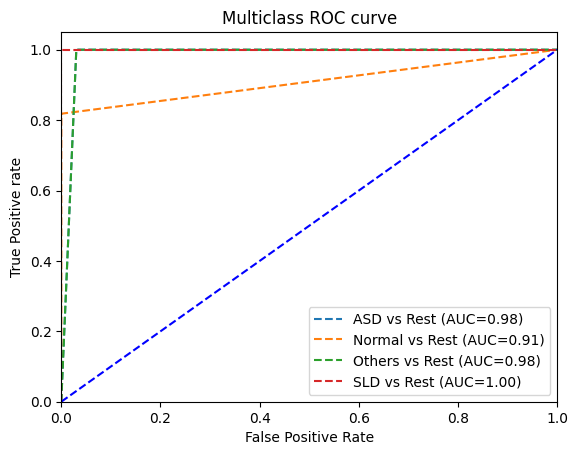

In [787]:

for i in range(n_class):
    fpr[i], tpr[i], thresh[i] = roc_curve(y_test_binarized[:,i], knnprediction_proba[:,i])
    roc_auc[i] = auc(fpr[i], tpr[i])

    # plotting
    plt.plot(fpr[i], tpr[i], linestyle='--',
             label='%s vs Rest (AUC=%0.2f)'%(classes[i],roc_auc[i]))

plt.plot([0,1],[0,1],'b--')
plt.xlim([0,1])
plt.ylim([0,1.05])
plt.title('Multiclass ROC curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive rate')
plt.legend(loc='lower right')
plt.show()

In [788]:
from sklearn.metrics import classification_report,confusion_matrix
print(confusion_matrix(y_test,knnprediction))
print(classification_report(y_test,knnprediction))

[[11  0  0  0]
 [ 1  9  1  0]
 [ 0  0 11  0]
 [ 0  0  0 11]]
              precision    recall  f1-score   support

         ASD       0.92      1.00      0.96        11
      Normal       1.00      0.82      0.90        11
      Others       0.92      1.00      0.96        11
         SLD       1.00      1.00      1.00        11

    accuracy                           0.95        44
   macro avg       0.96      0.95      0.95        44
weighted avg       0.96      0.95      0.95        44



##Multi-Layer Perceptron Classifier

In [789]:
from sklearn.neural_network import MLPClassifier
mlp = MLPClassifier()

In [790]:
mlp = MLPClassifier()


In [791]:
mlp.fit(X_train,y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPClassifier()

In [792]:
mlp.score(X_train,y_train)


0.96

In [793]:
prediction = mlp.predict(X_test)
prediction


array(['SLD', 'Normal', 'Normal', 'ASD', 'ASD', 'Normal', 'ASD', 'ASD',
       'Others', 'Normal', 'Normal', 'Others', 'ASD', 'SLD', 'SLD',
       'Others', 'SLD', 'ASD', 'Normal', 'Others', 'SLD', 'ASD', 'Normal',
       'Normal', 'Normal', 'Others', 'Others', 'Normal', 'SLD', 'ASD',
       'ASD', 'ASD', 'Others', 'Others', 'Others', 'Others', 'Others',
       'ASD', 'ASD', 'Normal', 'SLD', 'Normal', 'Others', 'SLD'],
      dtype='<U6')

In [794]:
mlpprediction_proba = mlp.predict_proba(X_test)

In [795]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,prediction)

0.8863636363636364

In [796]:
roc_auc_score(y_test,mlpprediction_proba,multi_class="ovr")

0.9765840220385675

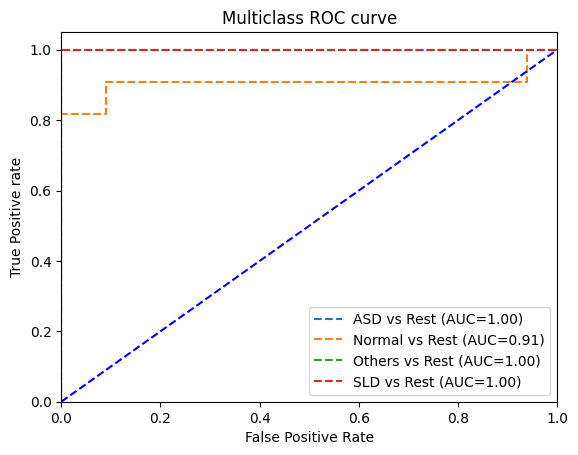

In [797]:

for i in range(n_class):
    fpr[i], tpr[i], thresh[i] = roc_curve(y_test_binarized[:,i], mlpprediction_proba[:,i])
    roc_auc[i] = auc(fpr[i], tpr[i])

    # plotting
    plt.plot(fpr[i], tpr[i], linestyle='--',
             label='%s vs Rest (AUC=%0.2f)'%(classes[i],roc_auc[i]))

plt.plot([0,1],[0,1],'b--')
plt.xlim([0,1])
plt.ylim([0,1.05])
plt.title('Multiclass ROC curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive rate')
plt.legend(loc='lower right')
plt.show()

In [798]:
from sklearn.metrics import classification_report,confusion_matrix
print(confusion_matrix(y_test,prediction))
print(classification_report(y_test,prediction))

[[11  0  0  0]
 [ 1  9  1  0]
 [ 0  0 11  0]
 [ 0  3  0  8]]
              precision    recall  f1-score   support

         ASD       0.92      1.00      0.96        11
      Normal       0.75      0.82      0.78        11
      Others       0.92      1.00      0.96        11
         SLD       1.00      0.73      0.84        11

    accuracy                           0.89        44
   macro avg       0.90      0.89      0.88        44
weighted avg       0.90      0.89      0.88        44



##XGBClassifier

In [799]:
y_pred = model.predict(X_test)

In [800]:
xgprediction_proba = model.predict_proba(X_test)

In [801]:
accuracy = accuracy_score(y_test,y_pred)
accuracy

0.9545454545454546

In [802]:
roc_auc_score(y_test,xgprediction_proba,multi_class="ovr")

0.9696969696969697

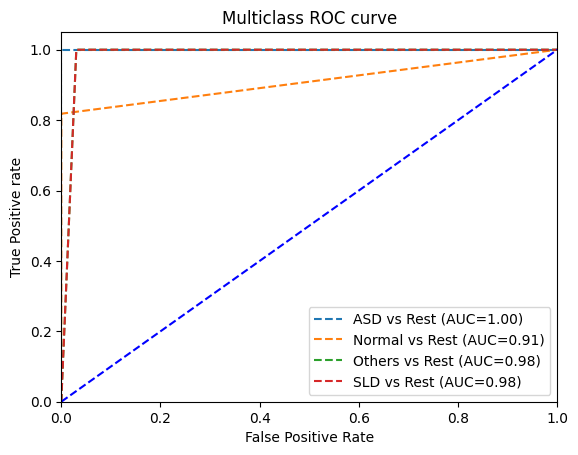

In [803]:

for i in range(n_class):
    fpr[i], tpr[i], thresh[i] = roc_curve(y_test_binarized[:,i], xgprediction_proba[:,i])
    roc_auc[i] = auc(fpr[i], tpr[i])

    # plotting
    plt.plot(fpr[i], tpr[i], linestyle='--',
             label='%s vs Rest (AUC=%0.2f)'%(classes[i],roc_auc[i]))

plt.plot([0,1],[0,1],'b--')
plt.xlim([0,1])
plt.ylim([0,1.05])
plt.title('Multiclass ROC curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive rate')
plt.legend(loc='lower right')
plt.show()

In [804]:
from sklearn.metrics import classification_report,confusion_matrix
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

[[11  0  0  0]
 [ 0  9  1  1]
 [ 0  0 11  0]
 [ 0  0  0 11]]
              precision    recall  f1-score   support

         ASD       1.00      1.00      1.00        11
      Normal       1.00      0.82      0.90        11
      Others       0.92      1.00      0.96        11
         SLD       0.92      1.00      0.96        11

    accuracy                           0.95        44
   macro avg       0.96      0.95      0.95        44
weighted avg       0.96      0.95      0.95        44



##Groupby

In [805]:
data2.groupby(['Delivery'])['Result'].apply(pd.Series.describe)

Delivery         
c-section  count         98
           unique         4
           top       Others
           freq          28
normal     count         24
           unique         3
           top          ASD
           freq          12
normal     count         22
           unique         4
           top       Others
           freq           8
Name: Result, dtype: object

In [806]:
data2.groupby(['Q2'])['Result'].apply(pd.Series.describe)

Q2         
no   count         35
     unique         4
     top          ASD
     freq          11
no   count          9
     unique         2
     top          SLD
     freq           7
yes  count        100
     unique         4
     top       Others
     freq          28
Name: Result, dtype: object

In [807]:
data_train.groupby(['Result'])['Age'].apply(pd.Series.describe)

Result       
ASD     count    25.000000
        mean      6.216000
        std       2.684474
        min       2.800000
        25%       2.800000
        50%       6.000000
        75%       8.000000
        max      10.000000
Normal  count    25.000000
        mean      5.004400
        std       2.772872
        min       1.900000
        25%       3.200000
        50%       4.000000
        75%       6.000000
        max      14.000000
Others  count    25.000000
        mean      4.306400
        std       1.473171
        min       2.110000
        25%       4.000000
        50%       4.000000
        75%       6.000000
        max       6.000000
SLD     count    25.000000
        mean      3.840000
        std       1.135782
        min       2.100000
        25%       2.700000
        50%       4.500000
        75%       4.500000
        max       5.300000
Name: Age, dtype: float64

## Plot

<Axes: xlabel='Age', ylabel='Density'>

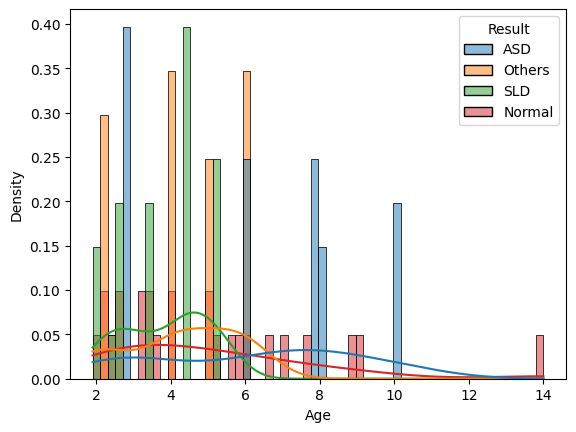

In [808]:
import seaborn as sns
sns.histplot(data=data_train, x='Age', stat="density", kde=True, bins=60, hue='Result')

## Countplot

<Axes: xlabel='Age', ylabel='count'>

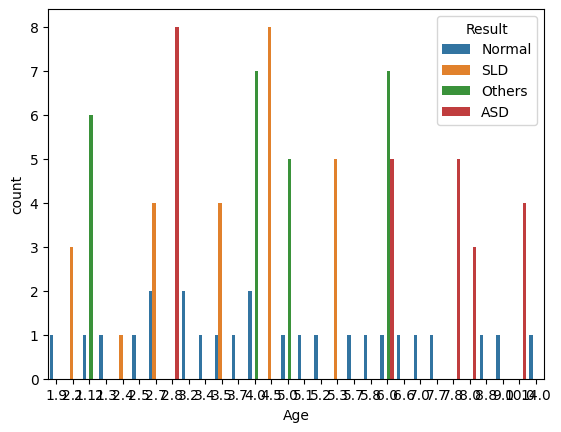

In [809]:
sns.countplot(x = 'Age', data = data_train, hue = "Result")

<Axes: xlabel='Object Rating', ylabel='count'>

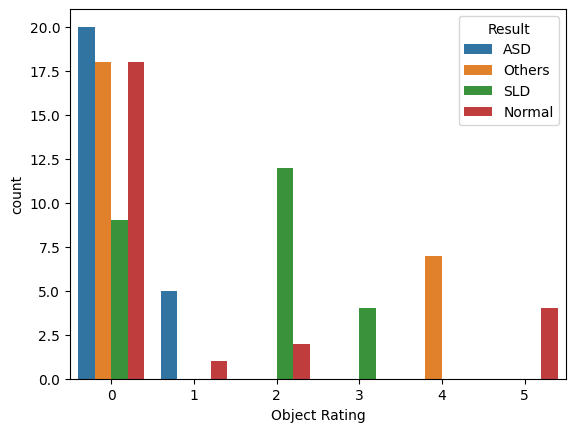

In [810]:
sns.countplot(x = 'Object Rating', data = data_train, hue = "Result")

In [811]:
data_train.groupby(['Gender_n'])['Result'].apply(pd.Series.describe)



Gender_n        
0         count      45
          unique      4
          top       ASD
          freq       17
1         count      55
          unique      4
          top       SLD
          freq       21
Name: Result, dtype: object

<Axes: xlabel='Gender_n', ylabel='count'>

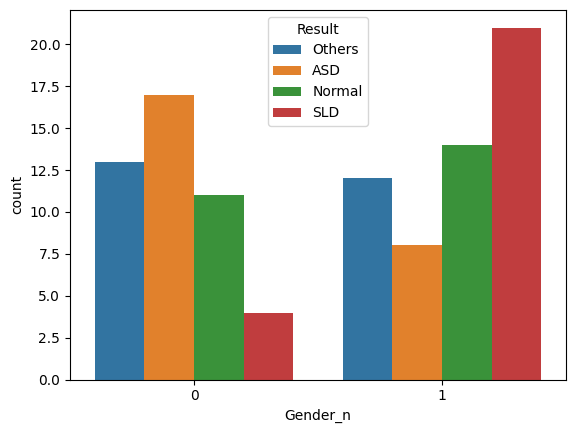

In [812]:
sns.countplot(x = 'Gender_n', data = data_train, hue = "Result")

In [813]:
data_train.groupby(['Result'])['Body Part  Rating'].apply(pd.Series.describe)



Result       
ASD     count    25.000000
        mean      0.200000
        std       0.408248
        min       0.000000
        25%       0.000000
        50%       0.000000
        75%       0.000000
        max       1.000000
Normal  count    25.000000
        mean      1.000000
        std       1.870829
        min       0.000000
        25%       0.000000
        50%       0.000000
        75%       1.000000
        max       5.000000
Others  count    25.000000
        mean      1.400000
        std       1.707825
        min       0.000000
        25%       0.000000
        50%       1.000000
        75%       4.000000
        max       4.000000
SLD     count    25.000000
        mean      1.600000
        std       1.290994
        min       0.000000
        25%       0.000000
        50%       2.000000
        75%       3.000000
        max       3.000000
Name: Body Part  Rating, dtype: float64

<Axes: xlabel='Body Part  Rating', ylabel='count'>

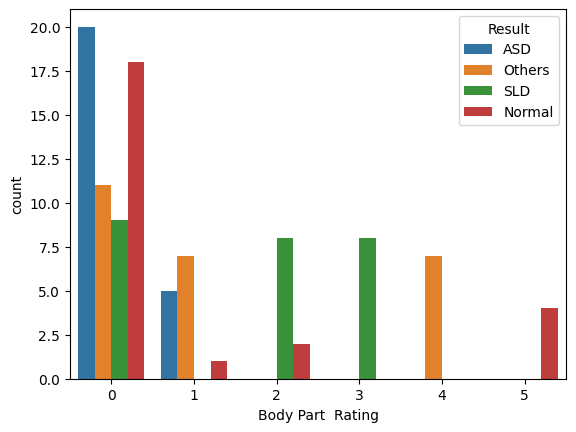

In [814]:
sns.countplot(x = 'Body Part  Rating', data = data_train, hue = "Result")

<Axes: xlabel='Delivery_n', ylabel='count'>

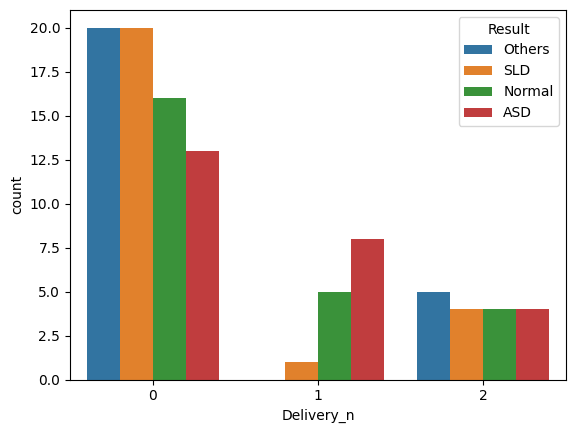

In [815]:
sns.countplot(x = 'Delivery_n', data = data_train, hue = "Result")

<Axes: xlabel='BirthInjury_n', ylabel='count'>

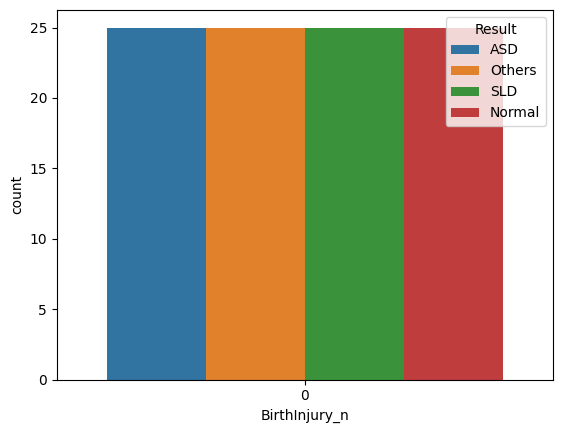

In [816]:
sns.countplot(x = 'BirthInjury_n', data = data_train, hue = "Result")

<Axes: xlabel='Jaundice_n', ylabel='count'>

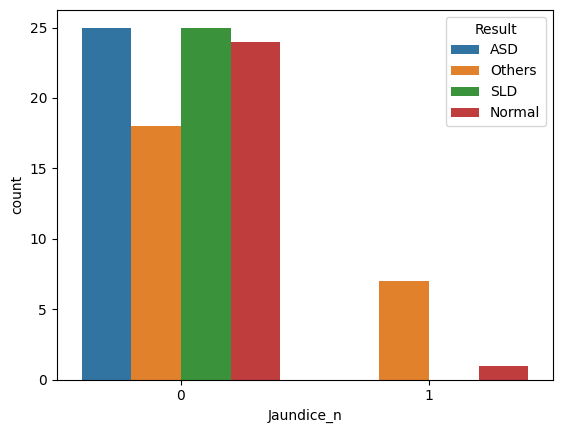

In [817]:
sns.countplot(x = 'Jaundice_n', data = data_train, hue = "Result")

<Axes: xlabel='CousinMarriage_n', ylabel='count'>

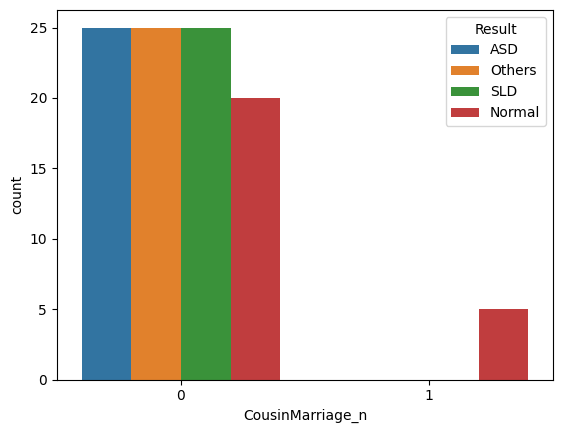

In [818]:
sns.countplot(x = 'CousinMarriage_n', data = data_train, hue = "Result")

<Axes: xlabel='Q1_n', ylabel='count'>

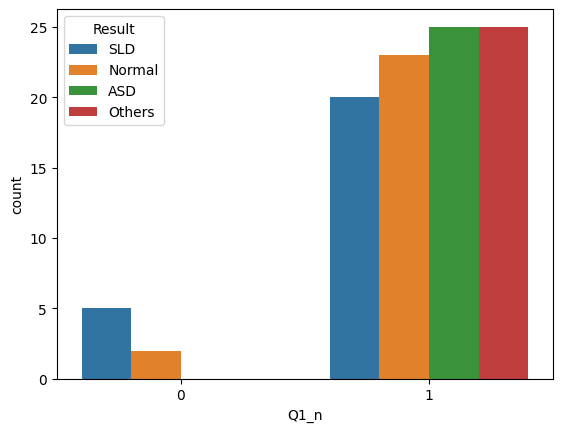

In [819]:
sns.countplot(x = 'Q1_n', data = data_train, hue = "Result")

<Axes: xlabel='Q2_n', ylabel='count'>

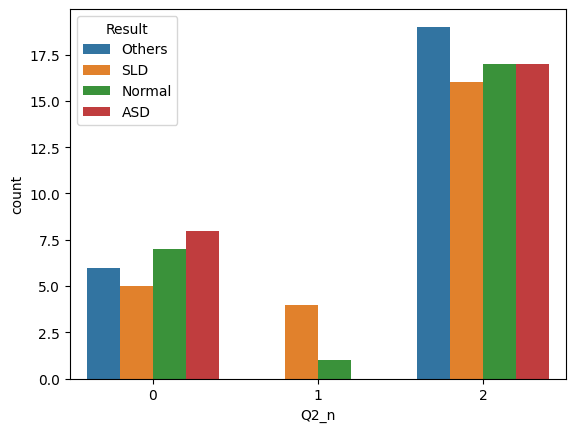

In [820]:
sns.countplot(x = 'Q2_n', data = data_train, hue = "Result")

<Axes: xlabel='Q3_n', ylabel='count'>

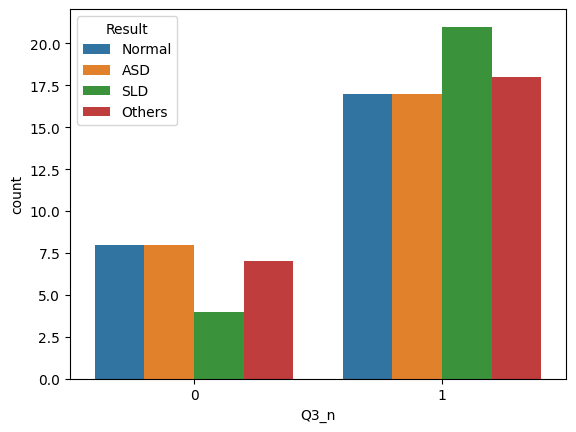

In [821]:
sns.countplot(x = 'Q3_n', data = data_train, hue = "Result")

<Axes: xlabel='Q4_n', ylabel='count'>

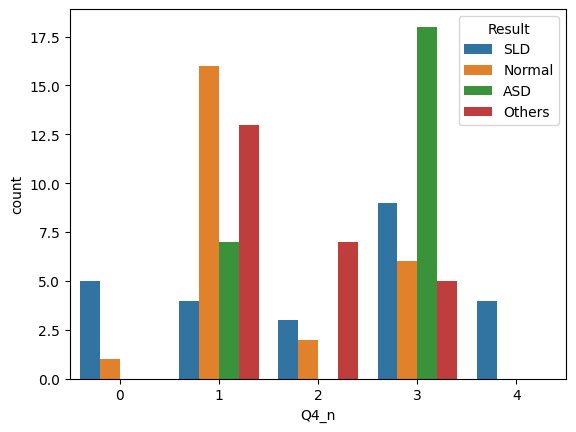

In [822]:
sns.countplot(x = 'Q4_n', data = data_train, hue = "Result")

<Axes: xlabel='Q5_n', ylabel='count'>

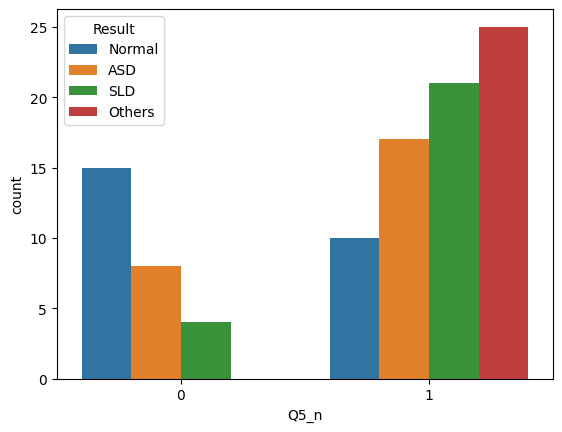

In [823]:
sns.countplot(x = 'Q5_n', data = data_train, hue = "Result")

<Axes: xlabel='Q6_n', ylabel='count'>

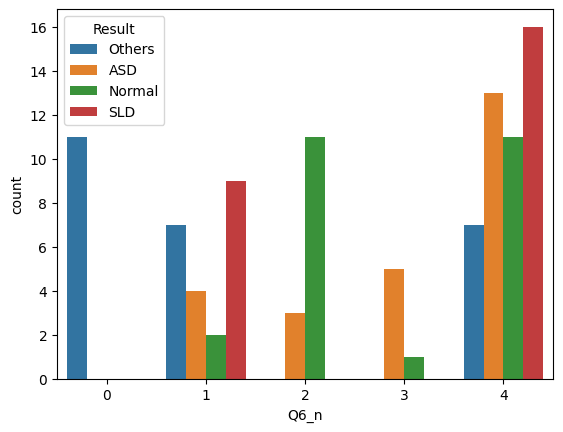

In [824]:
sns.countplot(x = 'Q6_n', data = data_train, hue = "Result")

<Axes: xlabel='Q7_n', ylabel='count'>

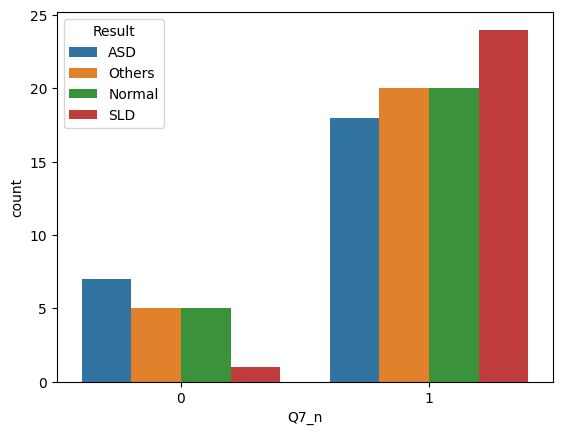

In [825]:
sns.countplot(x = 'Q7_n', data = data_train, hue = "Result")

<Axes: xlabel='Q8_n', ylabel='count'>

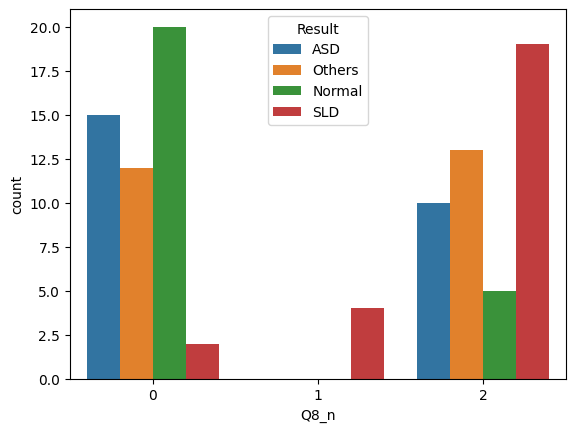

In [826]:
sns.countplot(x = 'Q8_n', data = data_train, hue = "Result")

<Axes: xlabel='Q9_n', ylabel='count'>

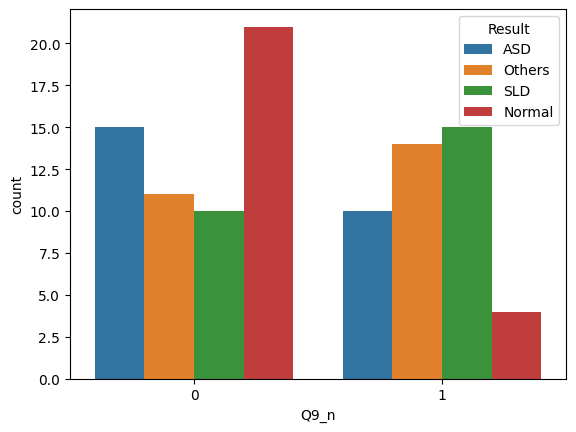

In [827]:
sns.countplot(x = 'Q9_n', data = data_train, hue = "Result")

<Axes: xlabel='Q10_n', ylabel='count'>

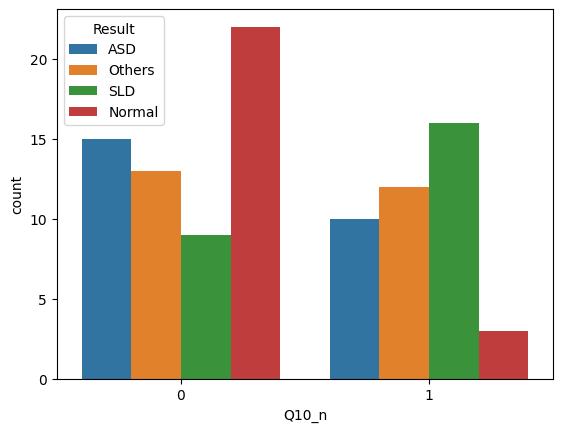

In [828]:
sns.countplot(x = 'Q10_n', data = data_train, hue = "Result")

<Axes: xlabel='Q11_n', ylabel='count'>

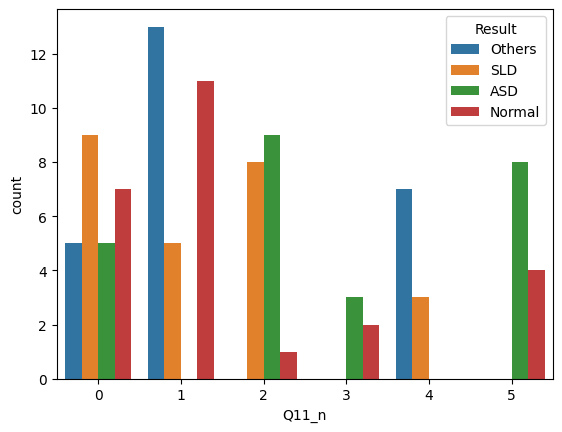

In [829]:
sns.countplot(x = 'Q11_n', data = data_train, hue = "Result")

### Making a heatmap to visualize the correlation matrix

<ipython-input-830-a007b36c7aa9>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corrmat = data2.corr()


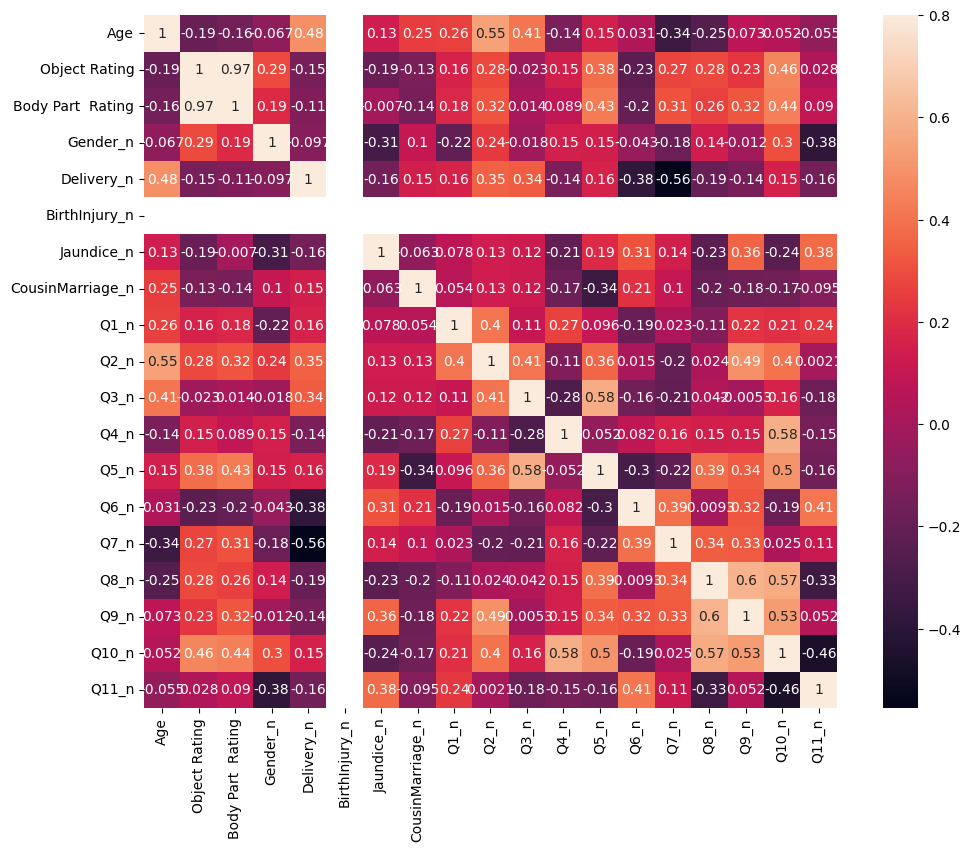

In [830]:
corrmat = data2.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, vmax=.8, square=True, annot=True);

#Normal distribution of the age values after log transformations to remove the skewness of the data

<ipython-input-831-22d3093346f9>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data2['Age'])


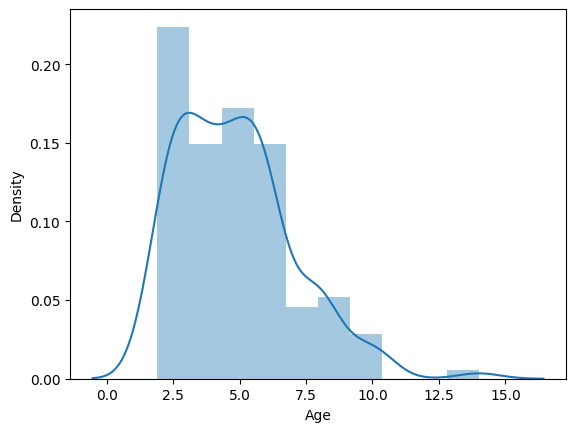

In [831]:
sns.distplot(data2['Age'])
plt.show()

##Pie chart for the number of data for each target

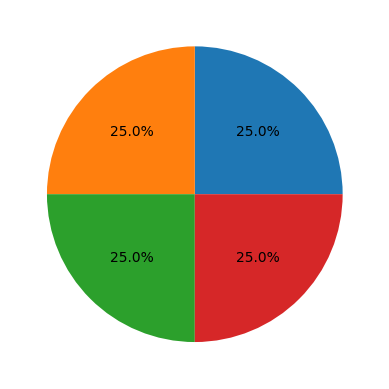

In [832]:
plt.pie(data2['Result'].value_counts().values, autopct='%1.1f%%')
plt.show()

In [833]:
data2

,Age,Gender,Delivery,Birth Injury,Jaundice,Cousin Marriage,Q1,Q2,Q3,Q4,...,Q2_n,Q3_n,Q4_n,Q5_n,Q6_n,Q7_n,Q8_n,Q9_n,Q10_n,Q11_n
0,6.0,Male,c-section,no,no,no,yes,yes,yes,no response,...,2,1,3,1,3,1,2,1,1,0
1,1.9,Male,c-section,no,no,no,no,no,no,aggressive,...,0,0,0,0,3,0,2,0,0,1
2,5.3,Male,normal,no,no,no,yes,yes,yes,aggressive,...,2,1,0,1,1,0,0,0,0,1
3,6.0,Female,c-section,no,yes,no,yes,yes,yes,cry,...,2,1,1,1,4,1,0,1,0,4
4,8.0,Male,normal,no,no,no,yes,yes,yes,cry,...,2,1,1,1,2,0,0,0,0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
139,4.5,Male,c-section,no,no,no,yes,yes,yes,no response,...,2,1,3,1,4,1,2,1,1,2
140,3.5,Male,c-section,no,no,no,yes,no,yes,shouting,...,1,1,4,1,1,1,1,0,1,0
141,4.5,Male,c-section,no,no,no,yes,yes,yes,no response,...,2,1,3,1,4,1,2,1,1,2
142,4.5,Male,c-section,no,no,no,yes,yes,yes,no response,...,2,1,3,1,4,1,2,1,1,2
